## **HEART DISEASE**

### **Import Library**

In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Load Dataset**

In [17]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### **Cek Structure Data**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [19]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


### **Memisahkan Feature dan Target**

In [33]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

### **Encode Target (y)**

In [21]:
y = y.map({
    'Absence': 0,
    'Presence': 1
})

In [22]:
y.value_counts()

,count
Heart Disease,
0,150
1,120


### **Encode Feature (X)**

In [23]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [24]:
X_encoded.shape

(270, 13)

### **Train–Test Split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### **Scaling**

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled[:5]

array([[-1.3361797 , -1.47528661, -0.10435568, -0.63795169, -0.76298149,
        -0.39380225, -1.05474207,  1.00746877, -0.68511879, -0.93924147,
         0.69812296, -0.70900762, -0.85615942],
       [-0.03903446,  0.67783439,  0.9202274 , -0.52273633,  0.73241188,
        -0.39380225,  0.95252037, -1.5511029 ,  1.4596009 ,  1.93715953,
         0.69812296,  1.43288953, -0.85615942],
       [-0.36332077, -1.47528661, -0.10435568, -0.63795169,  0.90719811,
        -0.39380225,  0.95252037,  0.28927321, -0.68511879, -0.39991629,
        -0.95896011, -0.70900762, -0.85615942],
       [ 1.58239708, -1.47528661, -2.15352185,  0.51420186, -0.1803607 ,
        -0.39380225, -1.05474207,  0.01994988, -0.68511879,  0.67873409,
        -0.95896011,  1.43288953, -0.85615942],
       [-0.03903446,  0.67783439, -0.10435568, -0.63795169,  0.18863247,
        -0.39380225,  0.95252037, -0.15959901, -0.68511879, -0.57969135,
         0.69812296, -0.70900762,  1.21589027]])

### **Train Logistic Regression**

In [28]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### **Prediction**

In [29]:
y_pred_lr = log_reg.predict(X_test_scaled)

### **Evaluation**

##### Accuracy

In [30]:
accuracy = accuracy_score(y_test, y_pred_lr)
accuracy

0.8518518518518519

##### Classification Report

In [31]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



##### Confusion Matrix

In [32]:
confusion_matrix(y_test, y_pred_lr)

array([[24,  6],
       [ 2, 22]])

### **ROC Curve and AUC**


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [39]:
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

In [41]:
auc_score = roc_auc_score(y_test, y_prob_lr)
auc_score

np.float64(0.898611111111111)

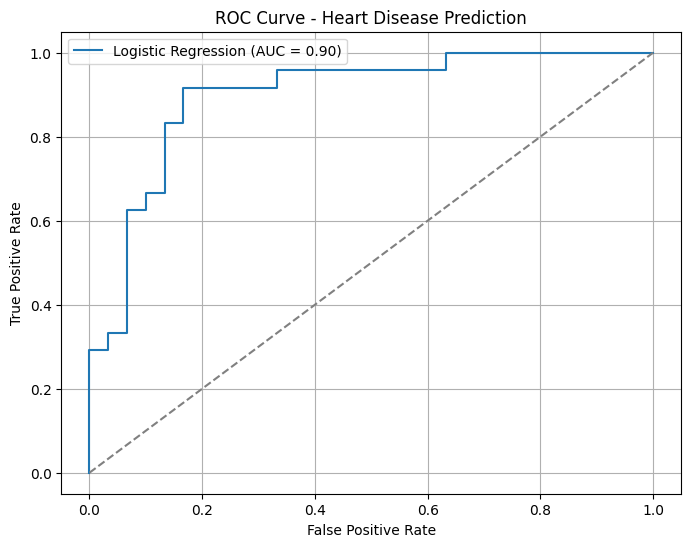

In [42]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease Prediction')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation of ROC Curve and AUC**

The ROC curve shows that the logistic regression model is able to distinguish
between patients with and without heart disease effectively. The AUC value of
approximately 0.87 indicates good classification performance.

This suggests that the model has a strong ability to rank patients with heart
disease higher than those without, making it suitable as a baseline model in
medical risk prediction tasks.


### **Feature Importance Analysis**


In [34]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': log_reg.coef_[0]
})

feature_importance_sorted = feature_importance.reindex(
    feature_importance['Coefficient'].abs().sort_values(ascending=False).index
)

feature_importance_sorted

,Feature,Coefficient
11,Number of vessels fluro,1.185769
1,Sex,0.892690
2,Chest pain type,0.716115
12,Thallium,0.584150
8,Exercise angina,0.481365
10,Slope of ST,0.413009
3,BP,0.408808
7,Max HR,-0.399470
5,FBS over 120,-0.347914
4,Cholesterol,0.341274


In [35]:
feature_importance_sorted.head(5)

,Feature,Coefficient
11,Number of vessels fluro,1.185769
1,Sex,0.892690
2,Chest pain type,0.716115
12,Thallium,0.584150
8,Exercise angina,0.481365


### **Visualisasi Feature Importance**

In [36]:
top_features = feature_importance_sorted.head(10)
top_features

,Feature,Coefficient
11,Number of vessels fluro,1.185769
1,Sex,0.892690
2,Chest pain type,0.716115
12,Thallium,0.584150
8,Exercise angina,0.481365
10,Slope of ST,0.413009
3,BP,0.408808
7,Max HR,-0.399470
5,FBS over 120,-0.347914
4,Cholesterol,0.341274


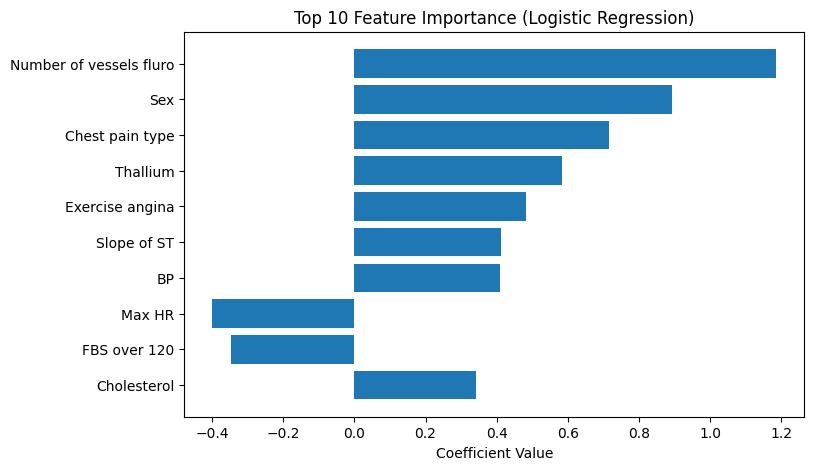

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    top_features['Feature'],
    top_features['Coefficient']
)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

#### **Interpretation of Feature Importance**

The results show that the number of vessels detected by fluoroscopy is the most
influential feature in predicting heart disease. Positive coefficient values indicate
that higher values of these variables increase the likelihood of heart disease.

Maximum heart rate (Max HR) has a negative coefficient, suggesting that patients with
lower maximum heart rates are more likely to experience heart disease. This finding
is consistent with the exploratory data analysis and the Tableau dashboard results.

Overall, the model aligns well with medical intuition and supports the use of
logistic regression as a strong baseline model for heart disease prediction.


### **Model Evaluation and Interpretation**

The Logistic Regression model achieves an accuracy of approximately 85%, with a good
balance between precision and recall across both classes. This indicates that the model
is capable of distinguishing patients with and without heart disease reasonably well.

However, the confusion matrix shows the presence of some false negatives, which is a
critical consideration in medical applications where failing to detect heart disease
may have serious consequences. Despite this limitation, the model serves as a strong
baseline and provides a solid foundation for further improvement using more advanced
models.


## **Final Conclusion**
This project applied exploratory data analysis and machine learning techniques
to analyze and predict heart disease based on demographic and clinical features.
Using Logistic Regression as a baseline model, the analysis demonstrated that
heart disease can be reasonably predicted using structured clinical data.

The model achieved an accuracy of approximately 85% and an AUC score of around
0.87, indicating good classification performance. Feature importance analysis
revealed that the number of major vessels detected by fluoroscopy, sex, chest
pain type, and maximum heart rate are among the most influential factors in
predicting heart disease.

The negative coefficient of maximum heart rate suggests that patients with lower
exercise capacity are more likely to experience heart disease, aligning with
medical intuition and the results observed during exploratory data analysis.
Overall, this project highlights the importance of combining data exploration,
statistical analysis, and machine learning to gain meaningful insights from
healthcare data.

This work serves as a solid foundation for further model improvement and
comparison using more advanced algorithms.
